In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from nanofm.data.tokenizers.image_tokenizer import ImageTokenizer
from nanofm.data.tokenizers.data_loader import MyImageDataset

## Load Dataset

In [2]:
dataset_path = "/Users/adrienbousquie/Documents/EPFL/ComProject/SAGA_COM-304/dataset_module/downloads/07"
img_dataset = MyImageDataset(
    data_path=dataset_path,
    csv_file="/Users/adrienbousquie/Documents/EPFL/ComProject/SAGA_COM-304/resources/vggsound.csv"
)

`use_fast` is set to `True` but the image processor class does not have a fast version.  Falling back to the slow version.


In [ ]:
img_dataset.__len__()

In [37]:
img_dataset[0]

{'frames': tensor([[[[-1.5733, -1.5733, -1.5733,  ..., -0.8580, -0.8142, -0.8142],
           [-1.5733, -1.5733, -1.5733,  ..., -0.8580, -0.8142, -0.8142],
           [-1.5733, -1.5733, -1.5733,  ..., -0.8580, -0.8142, -0.8142],
           ...,
           [-0.2448, -0.2740, -0.2448,  ..., -0.6244, -0.6536, -0.4930],
           [-0.2448, -0.2448, -0.2302,  ..., -0.4346, -0.5952, -0.6244],
           [-0.2594, -0.2302, -0.2302,  ..., -0.2740, -0.4492, -0.5806]],
 
          [[-1.6171, -1.6171, -1.6171,  ..., -0.9164, -0.9164, -0.9164],
           [-1.6171, -1.6171, -1.6171,  ..., -0.9164, -0.9164, -0.9164],
           [-1.6171, -1.6171, -1.6171,  ..., -0.9164, -0.9164, -0.9018],
           ...,
           [-0.2010, -0.2010, -0.2156,  ..., -0.1280, -0.1572, -0.1572],
           [-0.2010, -0.2010, -0.2156,  ..., -0.1426, -0.1572, -0.1572],
           [-0.2010, -0.2010, -0.2156,  ..., -0.1426, -0.1572, -0.1572]],
 
          [[-1.6171, -1.6171, -1.6171,  ..., -0.8142, -0.7850, -0.7850],
   

(256, 256, 3)


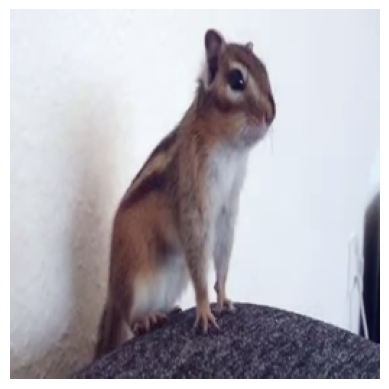

In [51]:
image_np = img_dataset[5]['rgb'].permute(1, 2, 0).cpu().numpy()

# Normalize the image for visualization
image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min() + 1e-8)
print(image_np.shape)
# Plot the image
plt.imshow(image_np)
plt.axis('off')  # Turn off axis
plt.show()

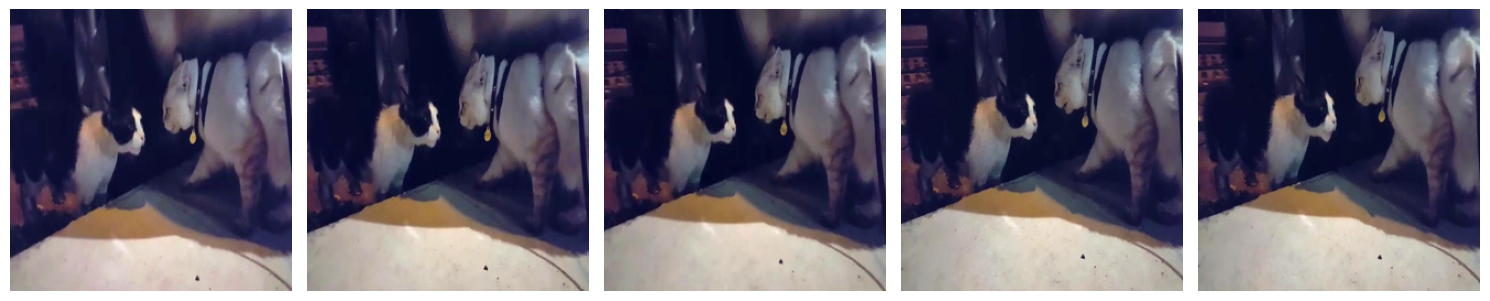

In [74]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))  # Create a figure with 5 subplots
for i, img in enumerate(img_dataset[0]['frames'].permute(1, 2, 3, 0).cpu()):
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)  # Normalize the image
    axes[i].imshow(img)  # Plot the image in the corresponding subplot
    axes[i].axis('off')  # Turn off axis for each subplot

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Image tokenizer

In [ ]:
img_tokenizer = ImageTokenizer(model_name=, device=torch.device('cuda'))

# Testing purposes cell

In [32]:
import pandas as pd

_dataset = pd.read_csv("/Users/adrienbousquie/Documents/EPFL/ComProject/SAGA_COM-304/resources/vggsound.csv")

_dataset[['video_clip_name', 'timestamp']]

,video_clip_name,timestamp
0,---g-f_I2yQ,1
1,--0PQM4-hqg,30
2,--56QUhyDQM,185
3,--5OkAjCI7g,40
4,--8puiAGLhs,30
...,...,...
199462,zzsUhaDSqzI,145
199463,zztvx3WUBss,30
199464,zzvCPtdNxNo,68
199465,zzvSVusPPgM,30
